In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import missingno as mn

__Load and Inspect data tables__

In [2]:
assess = pd.read_csv("anonymisedData/assessments.csv")
assess.head()

code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0

In [3]:
course = pd.read_csv("anonymisedData/courses.csv")
course.head()

code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240

In [4]:
studvle = pd.read_csv("anonymisedData/studentVle.csv")
studvle.head()

code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1

In [5]:
vle = pd.read_csv("anonymisedData/vle.csv")
vle.head()

id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AAA             2013J      resource        NaN      NaN

In [6]:
studinfo = pd.read_csv("anonymisedData/studentInfo.csv")
studinfo.head()

code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N         Pass  
2               60          Y    Withdrawn  
3               60          N         Pass  
4               60          N         Pass

In [7]:
studassess = pd.read_csv("anonymisedData/studentAssessment.csv")
studassess.head()

id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0

In [8]:
studregis = pd.read_csv("anonymisedData/studentRegistration.csv")
studregis.head()

code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN

__Checking for completeness and data exploration__

<AxesSubplot:>

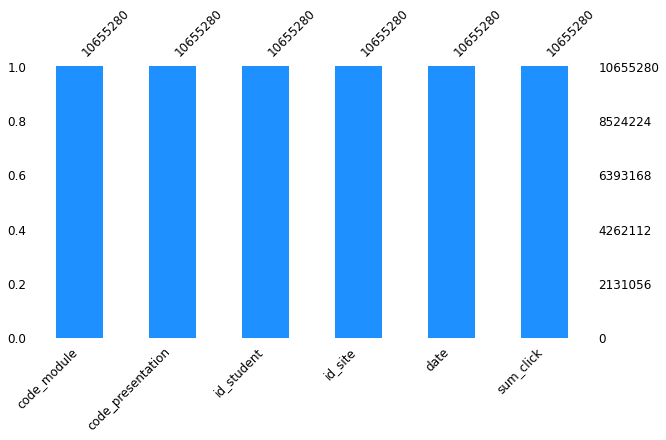

In [9]:
mn.bar(studvle, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)  # no missing values

<AxesSubplot:>

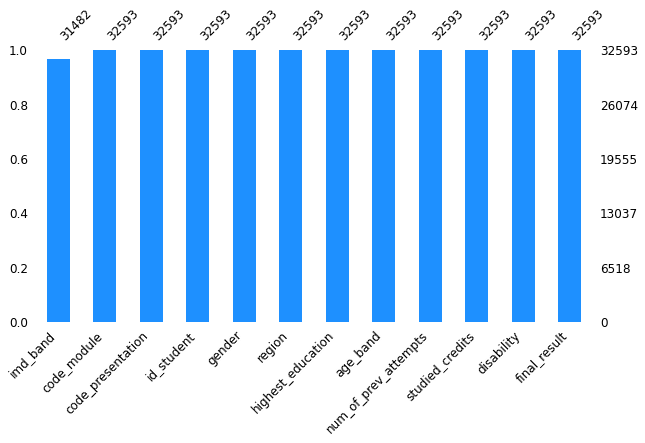

In [10]:
mn.bar(studinfo, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
# imd - index of multiple deprivation

In [11]:
studinfo["imd_band"].unique()


array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', nan,
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

In [12]:
studinfo["highest_education"].unique()
# HE- level 4 and above
# A-level - diploma, taken just before attending university
# Post Graduate 

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

In [13]:
studinfo["imd_band"] = np.where(studinfo["imd_band"] == '10-20', '10-20%',studinfo["imd_band"] )
studinfo["age_band"] = np.where(studinfo["age_band"] == '55<=', '55-',studinfo["age_band"] ) 
# preprocessing (required for boosting) , remove < and make column names consistent

<AxesSubplot:>

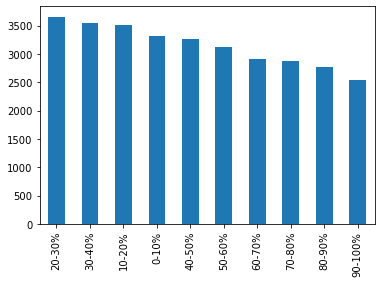

In [14]:
studinfo['imd_band'].value_counts(sort=True).plot(kind = "bar")

In [15]:
studinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [16]:
len(studinfo["id_student"].unique()) # number of unique students

28785

<AxesSubplot:>

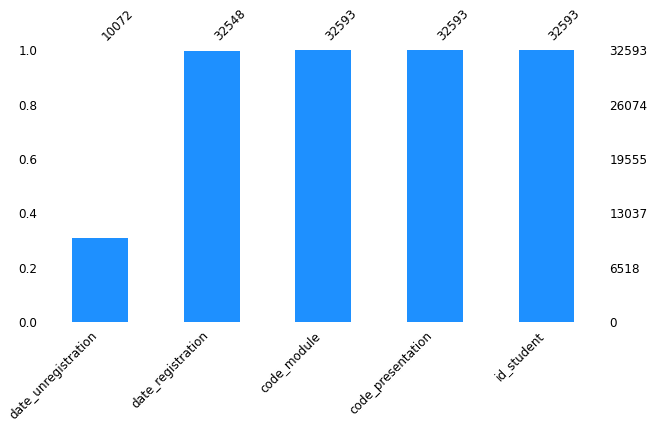

In [17]:
mn.bar(studregis, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

In [18]:
studregis.info()
# date_unregis is empty for students completing
# date_registration is empty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


<AxesSubplot:>

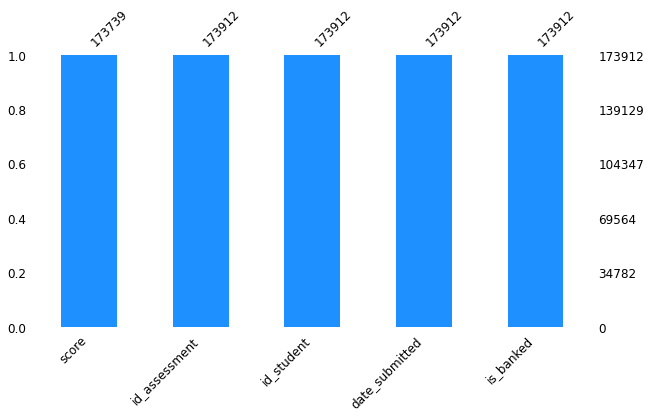

In [19]:
mn.bar(studassess, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
# students with no score are either failed or withdrawn

In [20]:
studassess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


<AxesSubplot:>

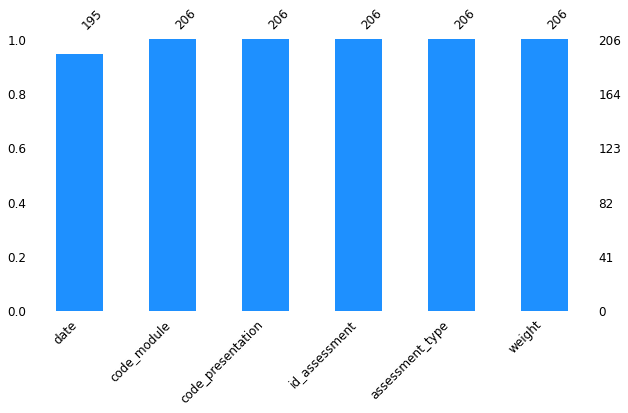

In [21]:
mn.bar(assess, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
# all missing values of date are exams, indicate last day of module

In [22]:
assess["assessment_type"].unique()
# tutor or computer marked

array(['TMA', 'Exam', 'CMA'], dtype=object)

<AxesSubplot:>

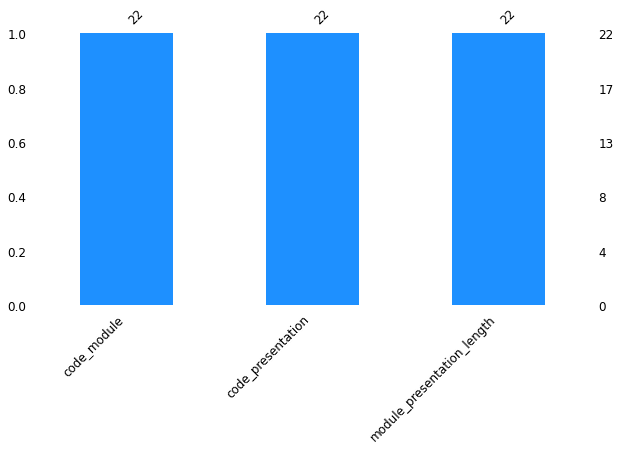

In [23]:
mn.bar(course, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12) # no missing values

<AxesSubplot:>

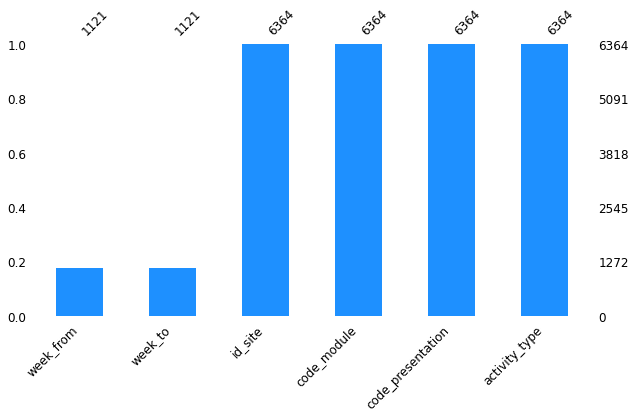

In [24]:
mn.bar(vle, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

Replace missing values of IMD Band with most frequent value of corresponding region, helps to remove missing values before model training

In [25]:
studinfo['imd_band'] = studinfo.apply(lambda x: studinfo[studinfo['region']==x['region']]['imd_band'].mode()[0] \
    if pd.isna(x['imd_band']) else x['imd_band'], axis=1)


In [26]:
# join tables vle, studvle, course, and studinfo
# used for analysis with interaction and student data

vle_join = vle.drop(["code_module","code_presentation", "week_from", "week_to"],axis=1)
data_vle1 = pd.merge(studvle, vle_join, how="left", left_on = "id_site", right_on="id_site")
data_vle2 = pd.merge(data_vle1, course, how="left", left_on = ["code_module","code_presentation"], right_on=["code_module","code_presentation"])
data_vle = pd.merge(data_vle2, studinfo, how="left", left_on = ["id_student","code_module","code_presentation"], right_on=["id_student","code_module","code_presentation"])


for col in ["activity_type","gender","region","highest_education","age_band","imd_band","disability","final_result"]:
    data_vle[col]=data_vle[col].astype('category')

data_vle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10655280 entries, 0 to 10655279
Data columns (total 17 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   code_module                 object  
 1   code_presentation           object  
 2   id_student                  int64   
 3   id_site                     int64   
 4   date                        int64   
 5   sum_click                   int64   
 6   activity_type               category
 7   module_presentation_length  int64   
 8   gender                      category
 9   region                      category
 10  highest_education           category
 11  imd_band                    category
 12  age_band                    category
 13  num_of_prev_attempts        int64   
 14  studied_credits             int64   
 15  disability                  category
 16  final_result                category
dtypes: category(8), int64(7), object(2)
memory usage: 894.2+ MB


In [27]:
data_vle.head()

code_module code_presentation  id_student  id_site  date  sum_click  \
0         AAA             2013J       28400   546652   -10          4   
1         AAA             2013J       28400   546652   -10          1   
2         AAA             2013J       28400   546652   -10          1   
3         AAA             2013J       28400   546614   -10         11   
4         AAA             2013J       28400   546714   -10          1   

  activity_type  module_presentation_length gender    region  \
0       forumng                         268      F  Scotland   
1       forumng                         268      F  Scotland   
2       forumng                         268      F  Scotland   
3      homepage                         268      F  Scotland   
4     oucontent                         268      F  Scotland   

  highest_education imd_band age_band  num_of_prev_attempts  studied_credits  \
0  HE Qualification   20-30%    35-55                     0               60   
1  HE Qualification   20-30%    35-55                     0               60   
2  HE Qualification   20-30%    35-55                     0               60   
3  HE Qualification   20-30%    35-55                     0               60   
4  HE Qualification   20-30%    35-55                     0               60   

  disability final_result  
0          N         Pass  
1          N         Pass  
2          N         Pass  
3          N         Pass  
4          N         Pass

<AxesSubplot:>

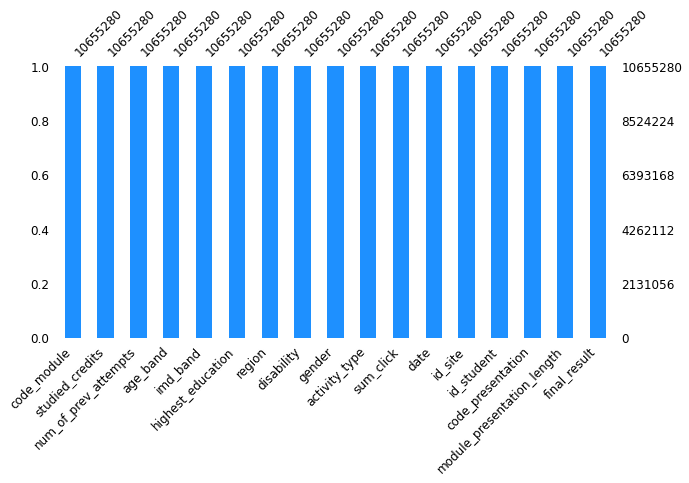

In [28]:
mn.bar(data_vle, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12) # check for missing values, none missing

In [29]:
data_vle.to_csv("data_vle.csv", index = False)

In [30]:
# combination of assessment data with student information
data_assess1 = pd.merge(studassess, assess, how="left", left_on = "id_assessment", right_on="id_assessment")
data_assess2 = pd.merge(data_assess1, studregis, how="left", left_on = ["code_module","code_presentation","id_student"], right_on=["code_module","code_presentation","id_student"])

data_assess = pd.merge(data_assess2, studinfo, how="left", left_on = ["code_module","code_presentation","id_student"], right_on=["code_module","code_presentation","id_student"])

data_assess["imd_band"] = np.where(data_assess["imd_band"].isnull(), "Missing",data_assess["imd_band"] )

for col in ["assessment_type","gender","region","highest_education","age_band","imd_band","disability","final_result"]:
    data_assess[col]=data_assess[col].astype('category')

data_assess = data_assess.drop(["date","date_registration", "date_unregistration"],axis=1)

data_assess.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 173912 entries, 0 to 173911
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id_assessment         173912 non-null  int64   
 1   id_student            173912 non-null  int64   
 2   date_submitted        173912 non-null  int64   
 3   is_banked             173912 non-null  int64   
 4   score                 173739 non-null  float64 
 5   code_module           173912 non-null  object  
 6   code_presentation     173912 non-null  object  
 7   assessment_type       173912 non-null  category
 8   weight                173912 non-null  float64 
 9   gender                173912 non-null  category
 10  region                173912 non-null  category
 11  highest_education     173912 non-null  category
 12  imd_band              173912 non-null  category
 13  age_band              173912 non-null  category
 14  num_of_prev_attempts  173912 non-nul

Change interaction data from row to column. These interaction columns will be used as modeling attribute 

In [31]:
data_interaction = data_vle.groupby(["id_student","code_module","code_presentation",
                "activity_type"]).agg(total_click = ('sum_click','sum')).reset_index()
data_interaction.head()

id_student code_module code_presentation activity_type  total_click
0        6516         AAA             2013B      dataplus            0
1        6516         AAA             2013B      dualpane            0
2        6516         AAA             2013B  externalquiz            0
3        6516         AAA             2013B        folder            0
4        6516         AAA             2013B       forumng            0

In [32]:
data1 = pd.pivot_table(data_interaction, index = ["id_student","code_module","code_presentation"],columns = ["activity_type"],
                                          aggfunc={'total_click':'sum'}).reset_index()
data1.columns = ["_".join(a) for a in data1.columns.to_flat_index()]
# change column names
c = list(data1.columns.astype(str))
c = [s.replace('total_click_', '') for s in c]
data1.columns = ["id_student","code_module","code_presentation"]+c[3:]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730072 entries, 0 to 730071
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id_student         730072 non-null  int64 
 1   code_module        730072 non-null  object
 2   code_presentation  730072 non-null  object
 3   dataplus           730072 non-null  int64 
 4   dualpane           730072 non-null  int64 
 5   externalquiz       730072 non-null  int64 
 6   folder             730072 non-null  int64 
 7   forumng            730072 non-null  int64 
 8   glossary           730072 non-null  int64 
 9   homepage           730072 non-null  int64 
 10  htmlactivity       730072 non-null  int64 
 11  oucollaborate      730072 non-null  int64 
 12  oucontent          730072 non-null  int64 
 13  ouelluminate       730072 non-null  int64 
 14  ouwiki             730072 non-null  int64 
 15  page               730072 non-null  int64 
 16  questionnaire      7

In [33]:
# join tables vle, studvle, course, and studinfo
data_vle_sumclicks = pd.merge(studinfo,data1, how="left", left_on = ["id_student","code_module","code_presentation"], right_on=["id_student","code_module","code_presentation"])


data_vle_sumclicks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32593 non-null  object 
 1   code_presentation     32593 non-null  object 
 2   id_student            32593 non-null  int64  
 3   gender                32593 non-null  object 
 4   region                32593 non-null  object 
 5   highest_education     32593 non-null  object 
 6   imd_band              32593 non-null  object 
 7   age_band              32593 non-null  object 
 8   num_of_prev_attempts  32593 non-null  int64  
 9   studied_credits       32593 non-null  int64  
 10  disability            32593 non-null  object 
 11  final_result          32593 non-null  object 
 12  dataplus              29741 non-null  float64
 13  dualpane              29741 non-null  float64
 14  externalquiz          29741 non-null  float64
 15  folder             

In [34]:
data_vle_sumclicks.head()

code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%      55-                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits  ... ouelluminate ouwiki  page  questionnaire  quiz  \
0              240  ...          0.0    0.0   0.0            0.0   0.0   
1               60  ...          0.0    0.0   0.0            0.0   0.0   
2               60  ...          0.0    0.0   0.0            0.0   0.0   
3               60  ...          0.0    0.0   0.0            0.0   0.0   
4               60  ...          0.0    0.0   0.0            0.0   0.0   

   repeatactivity  resource  sharedsubpage  subpage   url  
0             0.0      13.0            0.0     32.0   5.0  
1             0.0      12.0            0.0     87.0  48.0  
2             0.0       4.0            0.0     22.0   4.0  
3             0.0      19.0            0.0    144.0  90.0  
4             0.0      45.0            0.0     79.0  14.0  

[5 rows x 32 columns]

In [35]:
data_vle_sumclicks = data_vle_sumclicks.fillna(0)
data_vle_sumclicks.to_csv("data_vle_sumclicks.csv",index = False)


Check Final files for missing values

<AxesSubplot:>

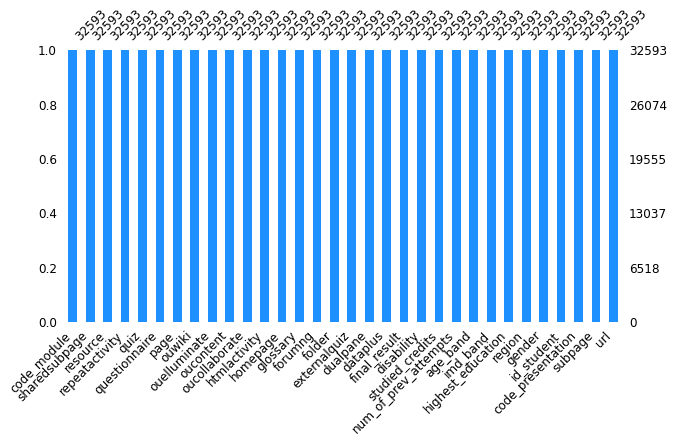

In [36]:
mn.bar(data_vle_sumclicks, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

<AxesSubplot:>

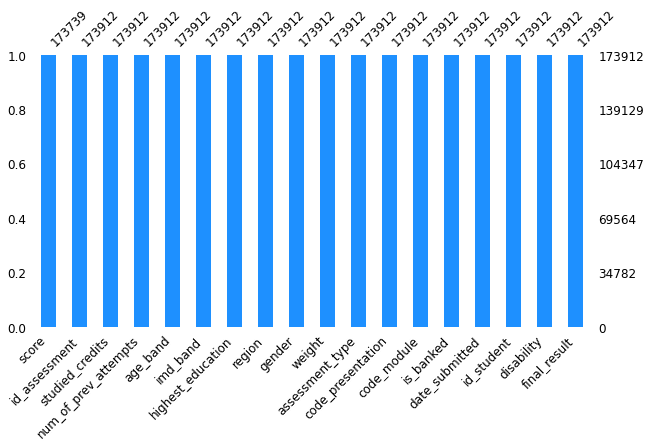

In [37]:
mn.bar(data_assess, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

In [38]:
data_assess.to_csv("data_assess.csv", index = False)

<font size="5">Data Exploration</font>

In [39]:
studinfo_unique= studinfo.drop_duplicates('id_student')
student_gender_values = studinfo_unique.groupby('gender').count()
list(student_gender_values.id_student)


[13739, 15046]

In [40]:
student_gender_pie = px.pie(values=list(student_gender_values.id_student), names=list(student_gender_values.index) , 
             title='Students Gender', color=['F', 'M'], color_discrete_map={'F':'orange','M':'blue'})
student_gender_pie.show()

In [41]:
fig = px.pie(studinfo, names='highest_education',  
             height=500, width=800,
             hole=0.5, 
             title='Highest Education Among Students',
             color_discrete_sequence=['blue','green','brown', 'goldenrod', 'magenta'])
fig.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  legend=dict(orientation="h")

)
fig.show()

In [42]:
fig = px.pie(studinfo, names='final_result',  
             height=500, width=800,
             hole=0.5, 
             title='Final Outcome for Students',
             color_discrete_sequence=['green', 'goldenrod','brown','blue', 'magenta'])
fig.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  legend=dict(orientation="h")

)
fig.show()

In [43]:
fig = px.pie(studinfo, names='highest_education',  
             height=500, width=800,
             hole=0.5, 
             title='Highest Education for Students',
             color_discrete_sequence=['green', 'goldenrod','brown','blue', 'magenta'])
fig.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  legend=dict(orientation="h")

)
fig.show()

In [44]:
fig = px.pie(studinfo, names='age_band',  
             height=500, width=800,
             hole=0.5, 
             title='Age Band for Students',
             color_discrete_sequence=['green', 'goldenrod','brown','blue', 'magenta'])
fig.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  legend=dict(orientation="h")

)
fig.show()

In [45]:
fig = px.pie(studinfo, names='disability',  
             height=500, width=800,
             hole=0.5, 
             title='Disability for Students',
             color_discrete_sequence=['green', 'goldenrod','brown','blue', 'magenta'])
fig.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  legend=dict(orientation="h")

)
fig.show()

In [46]:
courses_students_fig = px.histogram(studinfo, x='code_module', color='gender',
                                    color_discrete_map={'F':'brown','M':'green'})
courses_students_fig.update_layout(
    title_text='Number of Students in Each Course by Gender',
    xaxis_title_text='Module',
    yaxis_title_text='Number of Students',
)
courses_students_fig.show()

In [47]:
pie_df = studinfo.groupby('region').final_result.count().sort_values(ascending=False)
colors = ['green', 'goldenrod','brown','blue', 'magenta']
final_result_map=dict(zip(studinfo["region"].unique(), colors))

student_result_fig = px.bar(studinfo, x=pie_df.index, y=pie_df.values, 
                            color=pie_df.index, color_discrete_map=final_result_map)
student_result_fig.update_layout(
    xaxis_title_text='Region',
    yaxis_title_text='Number of Students',
    legend=dict(title="Region"))
student_result_fig.show()

In [48]:
pie_df=pie_df/sum(pie_df)
pie_df = studinfo.groupby('final_result').final_result.count().sort_values(ascending=False)
colors = ['green', 'goldenrod','brown','blue', 'magenta']
final_result_map=dict(zip(studinfo["final_result"].unique(), colors))

student_result_fig = px.bar(studinfo, x=pie_df.index, y=pie_df.values, 
                            color=pie_df.index, color_discrete_map=final_result_map)
student_result_fig.update_layout(
    xaxis_title_text='Final_Result',
    yaxis_title_text='Number of Students',
    legend=dict(title="Final_Result"))
student_result_fig.show()

In [49]:
pie_df = studinfo.groupby('highest_education').final_result.count().sort_values(ascending=False)
colors = ['green', 'goldenrod','brown','blue', 'magenta']
final_result_map=dict(zip(studinfo["highest_education"].unique(), colors))

student_result_fig = px.bar(studinfo, x=pie_df.index, y=pie_df.values, 
                            color=pie_df.index, color_discrete_map=final_result_map)
student_result_fig.update_layout(
    xaxis_title_text='Highest_Education',
    yaxis_title_text='Number of Students',
    legend=dict(title="Highest_Education"))
student_result_fig.show()

In [50]:
pie_df = studinfo.groupby('imd_band').final_result.count().sort_values(ascending=False)
colors = ['green', 'goldenrod','brown','blue', 'magenta']
final_result_map=dict(zip(studinfo["imd_band"].unique(), colors))

student_result_fig = px.bar(studinfo, x=pie_df.index, y=pie_df.values, 
                            color=pie_df.index, color_discrete_map=final_result_map)
student_result_fig.update_layout(
    xaxis_title_text='IMD_Band',
    yaxis_title_text='Number of Students',
    legend=dict(title="IMD_Band"))
student_result_fig.show()

In [51]:
pie_df = studinfo.groupby('age_band').final_result.count().sort_values(ascending=False)
colors = ['green', 'goldenrod','brown','blue', 'magenta']
final_result_map=dict(zip(studinfo["age_band"].unique(), colors))

student_result_fig = px.bar(studinfo, x=pie_df.index, y=pie_df.values, 
                            color=pie_df.index, color_discrete_map=final_result_map)
student_result_fig.update_layout(
    xaxis_title_text='Age_Band',
    yaxis_title_text='Number of Students',
    legend=dict(title="Age_Band"))
student_result_fig.show()

In [52]:
activity_result= data_vle.groupby(['code_module','code_presentation','final_result'])\
.mean()['sum_click'].reset_index()

/var/folders/cw/bx44gwj51rb06js_6cbw6rc40000gn/T/ipykernel_6902/723974033.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [53]:
# boxplot shows some variation in mean values with interaction
fig = px.box(activity_result, x="final_result", y="sum_click")
fig.show()

In [54]:
studinfo.groupby(['final_result','age_band']).code_module.count()

final_result  age_band
Distinction   0-35        1863
              35-55       1120
              55-           41
Fail          0-35        5231
              35-55       1792
              55-           29
Pass          0-35        8469
              35-55       3800
              55-           92
Withdrawn     0-35        7381
              35-55       2721
              55-           54
Name: code_module, dtype: int64

In [55]:
pie_df = studinfo.groupby('region').final_result.count().sort_values(ascending=False)
colors = ['green', 'goldenrod','brown','blue', 'magenta']
final_result_map=dict(zip(studinfo["region"].unique(), colors))

student_result_fig = px.bar(studinfo, x=pie_df.index, y=pie_df.values, 
                            color=pie_df.index, color_discrete_map=final_result_map)
student_result_fig.update_layout(
    xaxis_title_text='Region',
    yaxis_title_text='Number of Students',
    legend=dict(title="Region"))
student_result_fig.show()



In [56]:
colors = ['green', 'goldenrod','brown','blue', 'magenta']
final_result_map=dict(zip(studinfo["age_band"].unique(), colors))
age_result_fig = px.histogram(studinfo, x='final_result', color="age_band",
                   text_auto=True,
                   color_discrete_map=final_result_map)
age_result_fig.update_layout(
    title_text='Final Result for each Age Band',
    xaxis_title_text='Final Result',
    yaxis_title_text='Number of Students',
    legend=dict(title="Age Band")
)
age_result_fig.show()

__Examination of impact of attributes on the outcome__

__Increase in age shows greater percentage of pass and distinction students__

In [67]:
def plot_bar_by_col(col):  # function to calculate percentage of outcome values by given attibute
    result = data_assess.groupby([col,'final_result']).agg(count=('id_student',np.count_nonzero)).reset_index()
    sum = result.groupby([col]).agg(sum_result=('count',np.sum)).reset_index()
    data = pd.merge(result, sum, how="left", left_on = col, right_on = col)
    data["Percent"] = round(data["count"]/data["sum_result"]*100,3)
    return data
    
col = 'age_band'
data = plot_bar_by_col(col)
p = px.bar(data, x=col, y="Percent",title='Result by Age Band',
             color='final_result',color_discrete_sequence=['blue', 'brown','green','goldenrod', 'magenta'], 
             text_auto=True, width=600, height=500)

p.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    y=1.1,
    xanchor="right",
    x=1
))

p.show()

In [58]:
plot_bar_by_col('age_band')

age_band final_result  count  sum_result  Percent
0      0-35  Distinction  16151      119300   13.538
1      0-35         Fail  21033      119300   17.630
2      0-35         Pass  72890      119300   61.098
3      0-35    Withdrawn   9226      119300    7.733
4     35-55  Distinction   9876       53452   18.476
5     35-55         Fail   7328       53452   13.709
6     35-55         Pass  32461       53452   60.729
7     35-55    Withdrawn   3787       53452    7.085
8       55-  Distinction    303        1160   26.121
9       55-         Fail    105        1160    9.052
10      55-         Pass    670        1160   57.759
11      55-    Withdrawn     82        1160    7.069

__Better results with increase in IMD band__

In [68]:
col = 'imd_band'
data = plot_bar_by_col(col)
p = px.bar(data, x=col, y="Percent",title='Result by IMD Band',
             color='final_result',color_discrete_sequence=['blue', 'brown','green','goldenrod', 'magenta'], 
             text_auto=True, width=600, height=500)

p.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    y=1.1,
    xanchor="right",
    x=1
))

p.show()

In [66]:
# region
col = 'region'
data = plot_bar_by_col(col)
p = px.bar(data, x=col, y="Percent",title='Result by Region',
             color='final_result',color_discrete_sequence=['blue', 'brown','green','goldenrod', 'magenta'], 
             text_auto=True, width=600, height=500)

p.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    y=1.1,
    xanchor="right",
    x=1
))

p.show()

In [69]:
#gender
col = 'gender'
data = plot_bar_by_col(col)
p = px.bar(data, x=col, y="Percent",title='Result by Gender',
             color='final_result',color_discrete_sequence=['blue', 'brown','green','goldenrod', 'magenta'], 
             text_auto=True, width=600, height=500)

p.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    y=1.1,
    xanchor="right",
    x=1
))

p.show()

In [73]:
#higher education
col = 'highest_education'
data = plot_bar_by_col(col)
p=px.bar(data, x=col, y="Percent",title='Result by highest education level',
             color='final_result',color_discrete_sequence=['blue', 'brown','green','goldenrod', 'magenta'], 
             text_auto=True, width=600, height=600)
p.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    y=1.1,
    xanchor="right",
    x=1
))

p.show()

In [71]:
#disability
col = 'disability'
data = plot_bar_by_col(col)
p=px.bar(data, x=col, y="Percent",title='Result by Disability',
             color='final_result',color_discrete_sequence=['blue', 'brown','green','goldenrod', 'magenta'], 
             text_auto=True, width=600, height=500)

p.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    y=1.1,
    xanchor="right",
    x=1
))

p.show()

In [72]:
#number of previous attempts
col = 'num_of_prev_attempts'
data = plot_bar_by_col(col)
p=px.bar(data, x=col, y="Percent",title='Result by Previous Attempts',
             color='final_result',color_discrete_sequence=['blue', 'brown','green','goldenrod', 'magenta'], 
             text_auto=True, width=600, height=500)
# odds of passing decrease with increase in number of previous attempts till 3 previous attempts. 
# Above 3 previous attempts, the results are not representative due to small number of cases
p.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    y=1.1,
    xanchor="right",
    x=1
))

p.show()

In [65]:
mean_click = data_vle.groupby(['code_module','code_presentation','imd_band','final_result'])\
.agg(mean_click=('sum_click',np.mean)).reset_index()

p = px.histogram(mean_click, x="imd_band", y="mean_click",title='Clicking behaviour according to imd band',
             color='final_result', barmode='group',
             color_discrete_sequence=['blue', 'brown','green','goldenrod', 'magenta'])

p.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    y=1.1,
    xanchor="right",
    x=1
))

p.show()

Observations:
Higher interaction with VLE for successful (pass and distinction) students

Chance of success decreases with increase in previous attempts

Lower chances of success with disability

Increase in success with highest education level, IMD band, and age band

Change in performance with region seen